#### This notebook fits a neural network over Headlines dataset for sarcasm detection!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import text, sequence
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import hstack
import tensorflow as tf
from tensorflow import keras

tf.device = tf.device("gpu")

Load the dataset:

In [2]:
EMBEDDING_FILE = '../datasets/glove.twitter.27B.200d.txt'

In [3]:
# Suppose `texts` is a list of sentences.
data = pd.read_csv("../datasets/sarcasm_subset.csv")
data = data.sample(n=1000)

Explore the data:

In [4]:
data["text"] = data["parent_comment"] + data["comment"]
texts = data["text"].tolist()
labels = data["label"].values

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Use a fixed value for `maxlen` based on your data's requirements
maxlen = 200  # for example
data = pad_sequences(sequences, maxlen=maxlen)

# Convert the labels to a numpy array
labels = np.array(labels)


Check if the dataset is balanced?

In [6]:
embedding_index = {}
with open(EMBEDDING_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs



In [7]:
word_index = tokenizer.word_index
embedding_dim = 200 # Size of the GloVe vectors.
vocab_size = len(word_index) + 1  # Adding 1 because index 0 is reserved

X = np.zeros((len(sequences), embedding_dim))

for i, seq in enumerate(sequences):
    if len(seq):
        X[i] = np.mean([embedding_index.get(tokenizer.index_word.get(word), np.zeros(embedding_dim))
                        for word in seq], axis=0)

In [23]:

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=embedding_dim))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               51456     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 84481 (330.00 KB)
Trainable params: 84481 (330.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X, labels, epochs=8, batch_size=32, validation_split=0.2)


Epoch 1/8


25/25 [==============================] - 1s 7ms/step - loss: 0.7145 - accuracy: 0.5038 - val_loss: 0.6982 - val_accuracy: 0.5050
Epoch 2/8
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5400 - val_loss: 0.6893 - val_accuracy: 0.5150
Epoch 3/8
25/25 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5575 - val_loss: 0.6878 - val_accuracy: 0.5300
Epoch 4/8
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5437 - val_loss: 0.6870 - val_accuracy: 0.5600
Epoch 5/8
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5625 - val_loss: 0.6948 - val_accuracy: 0.5550
Epoch 6/8
25/25 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5875 - val_loss: 0.6886 - val_accuracy: 0.5250
Epoch 7/8
25/25 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5638 - val_loss: 0.6823 - val_accuracy: 0.5600
Epoch 8/8
25/25 [====================

Let's see the Training and Validation accuracy:

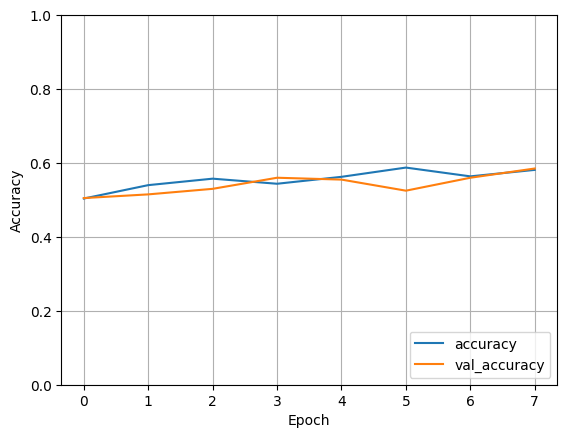

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

Let's see how the model does on loss:

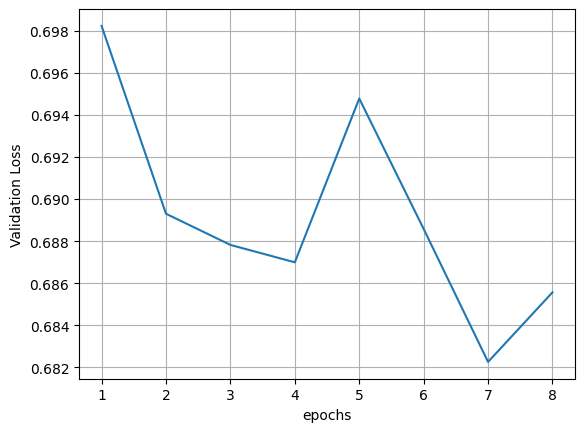

In [26]:
losses = history.history["val_loss"]
plt.plot(range(1,9), losses)
plt.xlabel("epochs")
plt.ylabel("Validation Loss")
plt.grid()
plt.show()

Accuracy: 58~60%